## Decision Tree

### Intuitive Features

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Load and prepare data
df = pd.read_csv('cleaned_tech_survey_oversample.csv').dropna()

In [22]:
X = df.drop(columns=['treatment'])
y = df['treatment']

In [23]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict and Evaluate
y_pred = dtree.predict(X_test)
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8

Confusion Matrix:
 [[17  3]
 [ 5 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.83      0.75      0.79        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



In [24]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Parameter grid to search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid search setup
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on training data
grid_search_dt.fit(X_train, y_train)

# Display best params and score
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Cross-Validated Accuracy:", round(grid_search_dt.best_score_, 3))


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Cross-Validated Accuracy: 0.901


In [25]:
# Use the best estimator found by GridSearchCV
best_dtree = grid_search_dt.best_estimator_

# Predict on test set
y_pred_best = best_dtree.predict(X_test)

# Evaluation
print("Tuned Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Tuned Decision Tree Accuracy: 0.8

Confusion Matrix:
 [[17  3]
 [ 5 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.83      0.75      0.79        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



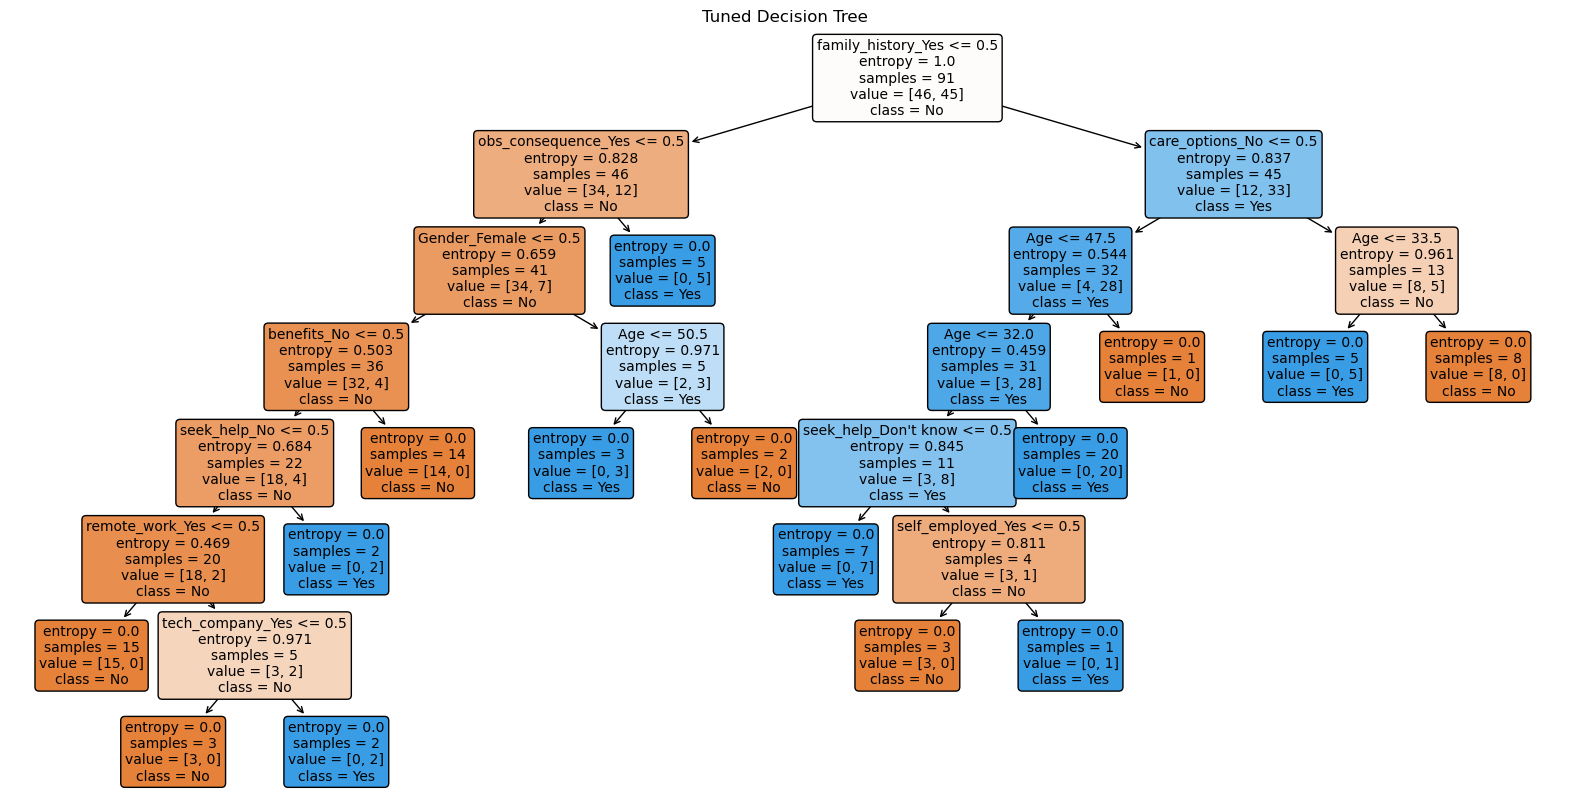

Decision tree saved to: output\decision_tree_visualization.png


In [26]:
import os
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create output directory if it doesn't exist
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Plot and save
plt.figure(figsize=(20, 10))
plot_tree(
    best_dtree,
    feature_names=list(X.columns),
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Tuned Decision Tree")
plot_path = os.path.join(output_dir, "decision_tree_visualization.png")
plt.savefig(plot_path)
plt.show()
plt.close()

print(f"Decision tree saved to: {plot_path}")


### All Features

In [27]:
# Load and prepare data
df_full = pd.read_csv('full_cleaned_tech_survey_oversampling.csv').dropna()
X_full = df_full.drop(columns=['treatment'])
y_full = df_full['treatment']

In [28]:
# Split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3, random_state=42, stratify=y_full)

# Train Decision Tree
dtree_full = DecisionTreeClassifier(random_state=42)
dtree_full.fit(X_train_full, y_train_full)

# Predict and Evaluate
y_pred_full = dtree_full.predict(X_test_full)
print("Decision Tree Accuracy:", round(accuracy_score(y_test_full, y_pred_full), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_full, y_pred_full))
print("\nClassification Report:\n", classification_report(y_test_full, y_pred_full))

Decision Tree Accuracy: 0.897

Confusion Matrix:
 [[18  2]
 [ 2 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.89      0.89      0.89        19

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



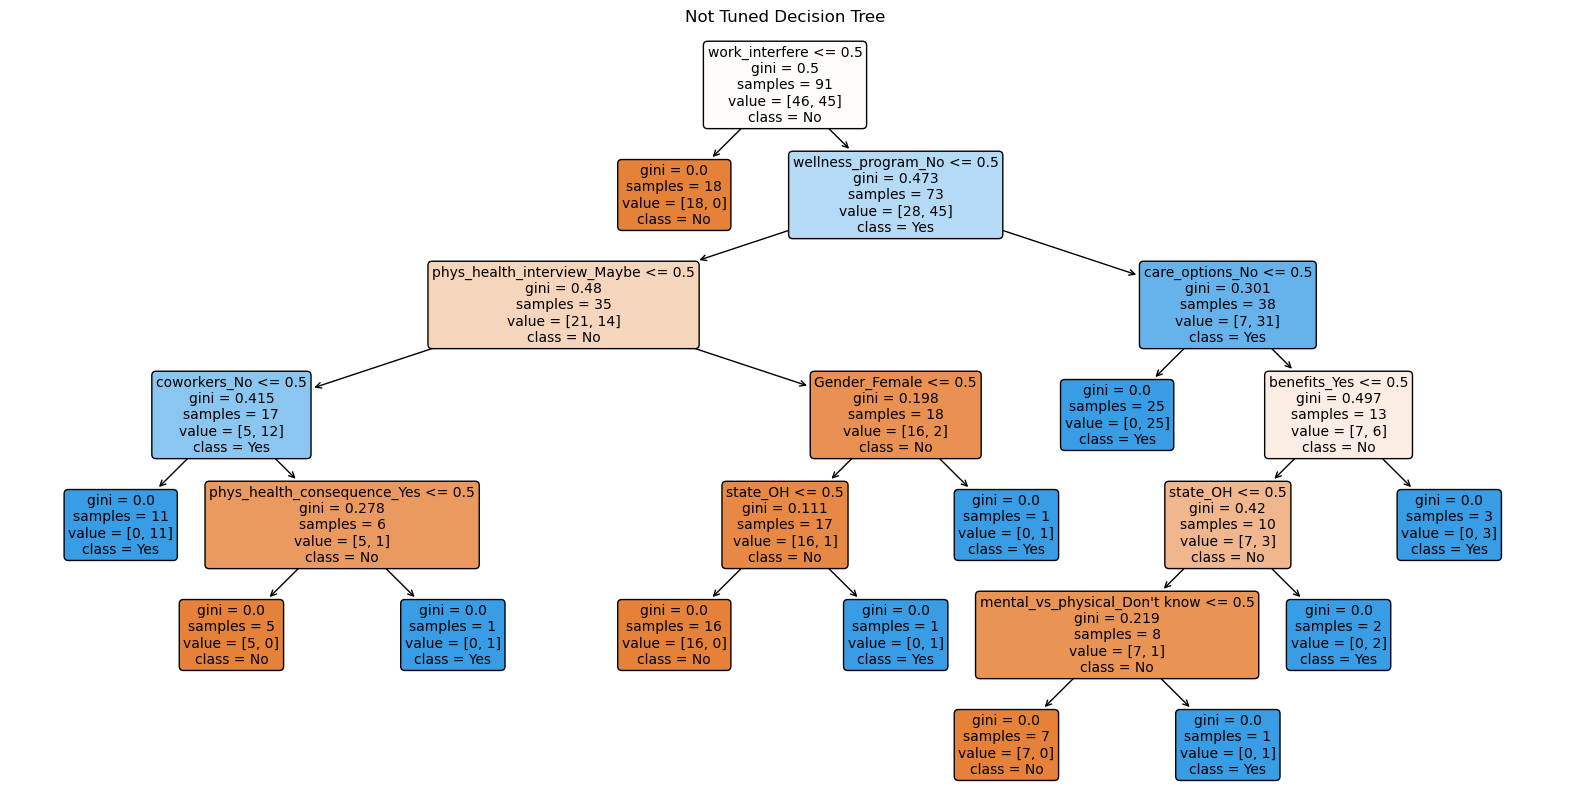

Decision tree saved to: output full\decision_tree_visualization_full_not_tuned.png


In [29]:
# Create output directory if it doesn't exist
output_dir_full = "output full"
os.makedirs(output_dir_full2, exist_ok=True)

# Plot and save
plt.figure(figsize=(20, 10))
plot_tree(
    dtree_full,
    feature_names=list(X_full.columns),
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Not Tuned Decision Tree")
plot_path_full = os.path.join(output_dir_full, "decision_tree_visualization_full_not_tuned.png")
plt.savefig(plot_path_full)
plt.show()
plt.close()

print(f"Decision tree saved to: {plot_path_full}")

In [30]:
# Parameter grid to search
param_grid_full = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Grid search setup
grid_search_dt_full = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_full,
    cv=strat_kfold,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on training data
grid_search_dt_full.fit(X_train_full, y_train_full)

# Display best params and score
print("Best Parameters:", grid_search_dt_full.best_params_)
print("Best Cross-Validated Accuracy:", round(grid_search_dt_full.best_score_, 3))


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best Cross-Validated Accuracy: 0.857


In [31]:
# Use the best estimator found by GridSearchCV
best_dtree_full = grid_search_dt_full.best_estimator_

# Predict on test set
y_pred_best_full = best_dtree_full.predict(X_test_full)

# Evaluation
print("Tuned Decision Tree Accuracy:", round(accuracy_score(y_test_full, y_pred_best_full), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_full, y_pred_best_full))
print("\nClassification Report:\n", classification_report(y_test_full, y_pred_best_full))


Tuned Decision Tree Accuracy: 0.795

Confusion Matrix:
 [[20  0]
 [ 8 11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       1.00      0.58      0.73        19

    accuracy                           0.79        39
   macro avg       0.86      0.79      0.78        39
weighted avg       0.85      0.79      0.78        39



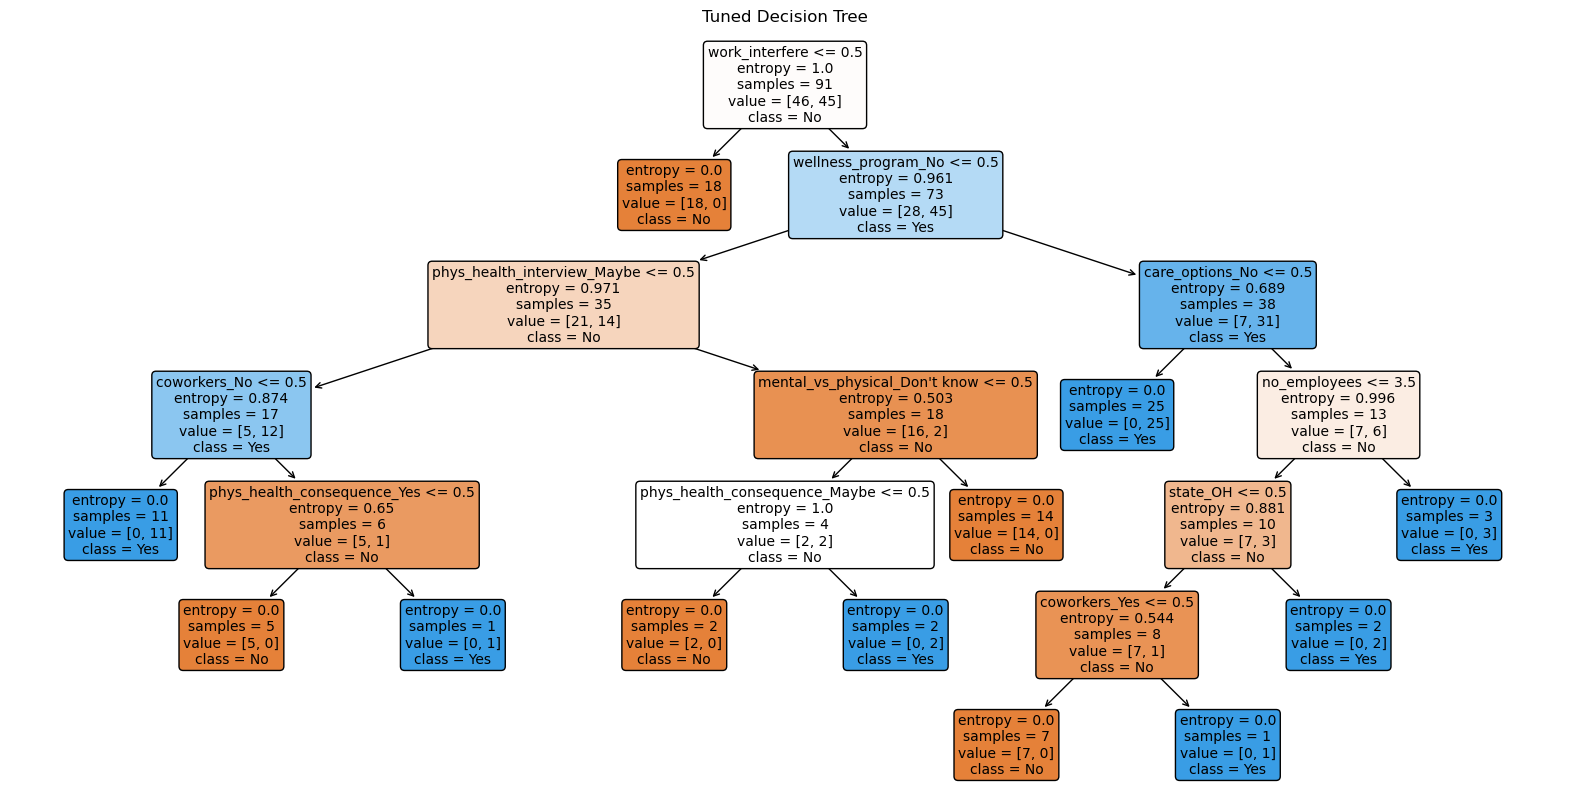

Decision tree saved to: output full\decision_tree_visualization_full_tuned.png


In [32]:
# Create output directory if it doesn't exist
output_dir_full = "output full"
os.makedirs(output_dir_full, exist_ok=True)

# Plot and save
plt.figure(figsize=(20, 10))
plot_tree(
    best_dtree_full,
    feature_names=list(X_full.columns),
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Tuned Decision Tree")
plot_path_full = os.path.join(output_dir_full, "decision_tree_visualization_full_tuned.png")
plt.savefig(plot_path_full)
plt.show()
plt.close()

print(f"Decision tree saved to: {plot_path_full}")

## K means

### Intuitive Features

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

df_selected = pd.read_csv("cleaned_tech_survey_with_unknown_not_encoded.csv").dropna()
df_X_scaled = pd.read_csv('cleaned_tech_survey_scaled_with_unknown.csv').dropna()

# Run KMeans with k=3
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(df_X_scaled)

df_selected['cluster'] = cluster_labels

print(df_selected[['treatment', 'cluster']].head())


C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  treatment  cluster
0       Yes        1
1        No        0
2        No        0
3       Yes        1
4        No        0


In [34]:
# Evaluation metrics
sil_score = silhouette_score(df_X_scaled, df_selected['cluster'])
ari_score = adjusted_rand_score(df_selected['treatment'], df_selected['cluster'])

print("Silhouette Score (cluster quality):", round(sil_score, 3))
print("Adjusted Rand Index (vs. treatment):", round(ari_score, 3))

Silhouette Score (cluster quality): 0.123
Adjusted Rand Index (vs. treatment): 0.095


In [35]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    intra_dists = []
    inter_dists = []

    for i in unique_clusters:
        cluster_i = X[labels == i]
        intra_dists.append(np.max(cdist(cluster_i, cluster_i)))
        for j in unique_clusters:
            if i != j:
                cluster_j = X[labels == j]
                inter_dists.append(np.min(cdist(cluster_i, cluster_j)))

    return np.min(inter_dists) / np.max(intra_dists)

# Initialize trackers
inertias = []
silhouettes = []
dunns = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_X_scaled, labels))
    dunns.append(dunn_index(df_X_scaled.to_numpy(), labels))

# Plot all three
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(k_range, inertias, marker='o')
axs[0].set_title("Elbow Method (Inertia)")
axs[0].set_xlabel("k")
axs[0].set_ylabel("Inertia")
axs[0].grid(True)

axs[1].plot(k_range, silhouettes, marker='o', color='green')
axs[1].set_title("Silhouette Score")
axs[1].set_xlabel("k")
axs[1].set_ylabel("Score")
axs[1].grid(True)

axs[2].plot(k_range, dunns, marker='o', color='purple')
axs[2].set_title("Dunn Index")
axs[2].set_xlabel("k")
axs[2].set_ylabel("Score")
axs[2].grid(True)

plt.tight_layout()
plt.savefig("output/kmeans_all_metrics_with_unknown.png")
plt.close()

# Select best k based on silhouette
best_k_silhouette = k_range[np.argmax(silhouettes)]
print(f"Best k by Silhouette: {best_k_silhouette} with score = {round(max(silhouettes), 3)}")

# Select best k based on Dunn
best_k_dunn = k_range[np.argmax(dunns)]
print(f"Best k by Dunn Index: {best_k_dunn} with score = {round(max(dunns), 3)}")

# Save metric scores if needed
metric_df = pd.DataFrame({
    'k': list(k_range),
    'Inertia': inertias,
    'Silhouette': silhouettes,
    'Dunn_Index': dunns
})
metric_df.to_csv("output/kmeans_metric_scores_with_unknown.csv", index=False)


C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Best k by Silhouette: 3 with score = 0.14
Best k by Dunn Index: 10 with score = 0.184


In [36]:
from sklearn.decomposition import PCA
import seaborn as sns

# Use best k from silhouette for clustering
final_k = best_k_silhouette
kmeans_final = KMeans(n_clusters=final_k, random_state=42)
final_labels = kmeans_final.fit_predict(df_X_scaled)
y_selected = df_selected['treatment']

# PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_X_scaled)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = final_labels
df_pca["Treatment"] = y_selected.values

# Plot PCA + clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", style="Treatment", s=60)
plt.title(f"KMeans Clustering Visualization (k={final_k}) with Treatment Overlay")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster / Treatment")
plt.grid(True)

# Save figure
cluster_plot_path = "output/kmeans_pca_visualization_with_unknown.png"
plt.tight_layout()
plt.savefig(cluster_plot_path)
plt.close()

print(f"Saved PCA visualization to: {cluster_plot_path}")


C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Saved PCA visualization to: output/kmeans_pca_visualization_with_unknown.png


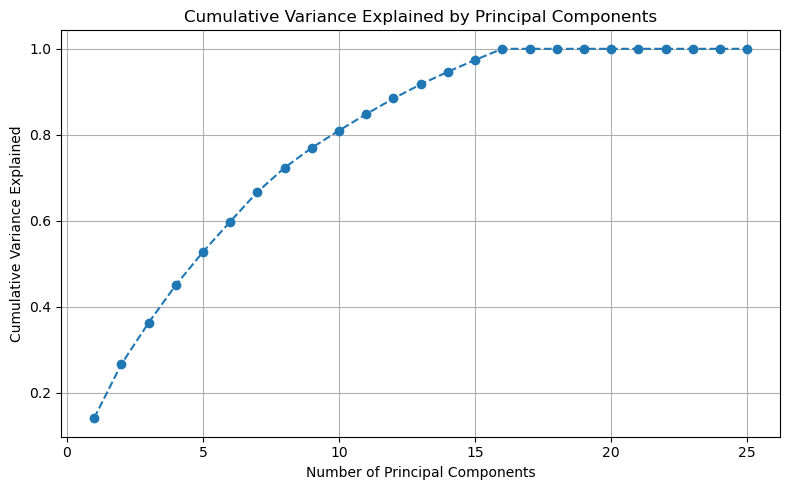

In [37]:
# Variance explained by each principal component
pca_cumul = PCA()
pca_cumul.fit(df_X_scaled)
explained_variance = pca_cumul.explained_variance_ratio_

# Cumulative variance (adding up variance from PC1, PC2, PC3, ...)
cumulative_variance = np.cumsum(explained_variance)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
import plotly.express as px
from sklearn.decomposition import PCA

# Apply 3D PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(df_X_scaled)

df_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_3d['Cluster'] = final_labels
df_3d['Treatment'] = y_selected

# Create interactive plot
fig = px.scatter_3d(
    df_3d, x='PC1', y='PC2', z='PC3',
    color='Cluster',
    symbol='Treatment',
    title=f"3D PCA Visualization of Clusters (k={final_k})",
    labels={'Cluster': 'Cluster', 'Treatment': 'Treatment'},
    width=1200,
    height=900
)

fig.update_layout(
    legend=dict(
        x=1.15,  # Move the legend to the right
        y=1,     # Keep it aligned with the top
        title="Treatment"
    ),
    margin=dict(l=50, r=50, b=100, t=50)
)

# Save as HTML
html_path = "output/kmeans_3d_pca_plot_with_unknown.html"
fig.write_html(html_path)

print(f"Interactive 3D PCA plot saved to: {html_path}")


Interactive 3D PCA plot saved to: output/kmeans_3d_pca_plot_with_unknown.html


### All Features

In [39]:
df_full = pd.read_csv("full_cleaned_tech_survey_with_unknown_not_encoded.csv")
df_X_full_scaled = pd.read_csv('full_cleaned_tech_survey_scaled_with_unknown.csv')

# Run KMeans with k=3
kmeans_full = KMeans(n_clusters=2, random_state=42)
cluster_labels_full = kmeans_full.fit_predict(df_X_full_scaled)

df_full['cluster'] = cluster_labels_full

print(df_full[['treatment', 'cluster']].head())

C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



  treatment  cluster
0       Yes        0
1        No        0
2        No        1
3       Yes        1
4        No        0


In [40]:
# Evaluation metrics
sil_score_full = silhouette_score(df_X_full_scaled, df_full['cluster'])
ari_score_full = adjusted_rand_score(df_full['treatment'], df_full['cluster'])

print("Silhouette Score (cluster quality):", round(sil_score, 3))
print("Adjusted Rand Index (vs. treatment):", round(ari_score, 3))

Silhouette Score (cluster quality): 0.123
Adjusted Rand Index (vs. treatment): 0.095


In [41]:
# Initialize trackers
inertias_full = []
silhouettes_full = []
dunns_full = []

k_range_full = range(2, 11)

for k_full in k_range_full:
    kmeans_full = KMeans(n_clusters=k_full, random_state=42)
    labels_full = kmeans_full.fit_predict(df_X_full_scaled)
    
    inertias_full.append(kmeans_full.inertia_)
    silhouettes_full.append(silhouette_score(df_X_full_scaled, labels_full))
    dunns_full.append(dunn_index(df_X_full_scaled.to_numpy(), labels_full))

# Plot all three
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(k_range_full, inertias_full, marker='o')
axs[0].set_title("Elbow Method (Inertia)")
axs[0].set_xlabel("k")
axs[0].set_ylabel("Inertia")
axs[0].grid(True)

axs[1].plot(k_range_full, silhouettes_full, marker='o', color='green')
axs[1].set_title("Silhouette Score")
axs[1].set_xlabel("k")
axs[1].set_ylabel("Score")
axs[1].grid(True)

axs[2].plot(k_range_full, dunns_full, marker='o', color='purple')
axs[2].set_title("Dunn Index")
axs[2].set_xlabel("k")
axs[2].set_ylabel("Score")
axs[2].grid(True)

plt.tight_layout()
plt.savefig("output full/kmeans_all_metrics_full_with_unknown.png")
plt.close()

# Select best k based on silhouette
best_k_silhouette_full = k_range_full[np.argmax(silhouettes_full)]
print(f"Best k by Silhouette: {best_k_silhouette_full} with score = {round(max(silhouettes_full), 3)}")

# Select best k based on Dunn
best_k_dunn_full = k_range_full[np.argmax(dunns_full)]
print(f"Best k by Dunn Index: {best_k_dunn_full} with score = {round(max(dunns_full), 3)}")

# Save metric scores if needed
metric_df = pd.DataFrame({
    'k': list(k_range_full),
    'Inertia': inertias_full,
    'Silhouette': silhouettes_full,
    'Dunn_Index': dunns_full
})
metric_df.to_csv("output full/kmeans_metric_scores_full_with_unknown.csv", index=False)


C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

Best k by Silhouette: 2 with score = 0.043
Best k by Dunn Index: 10 with score = 0.092


In [42]:
# Use best k from silhouette for clustering
final_k_full = best_k_silhouette_full
kmeans_final_full = KMeans(n_clusters=final_k_full, random_state=42)
final_labels_full = kmeans_final.fit_predict(df_X_full_scaled)
y_selected_full = df_full['treatment']

# PCA transformation
pca = PCA(n_components=2)
X_pca_full = pca.fit_transform(df_X_full_scaled)
df_pca_full = pd.DataFrame(X_pca_full, columns=["PC1", "PC2"])
df_pca_full["Cluster"] = final_labels_full
df_pca_full["Treatment"] = y_selected_full.values

# Plot PCA + clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", style="Treatment", s=60)
plt.title(f"KMeans Clustering Visualization (k={final_k_full}) with Treatment Overlay")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster / Treatment")
plt.grid(True)

# Save figure
cluster_plot_path_full = "output full/kmeans_pca_visualization_full_with_unknown.png"
plt.tight_layout()
plt.savefig(cluster_plot_path_full)
plt.close()

print(f"Saved PCA visualization to: {cluster_plot_path_full}")


C:\Users\korie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Saved PCA visualization to: output full/kmeans_pca_visualization_full_with_unknown.png


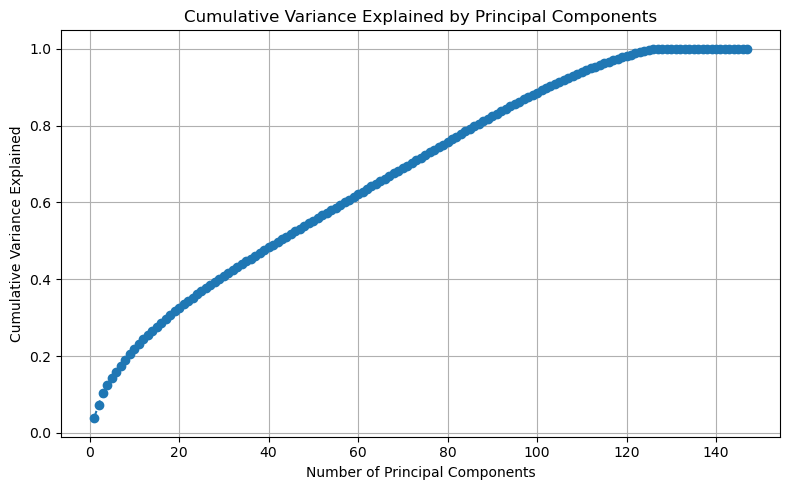

In [43]:
# Variance explained by each principal component
pca_cumul_full = PCA()
pca_cumul_full.fit(df_X_full_scaled)
explained_variance_full = pca_cumul_full.explained_variance_ratio_

# Cumulative variance (adding up variance from PC1, PC2, PC3, ...)
cumulative_variance_full = np.cumsum(explained_variance_full)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance_full)+1), cumulative_variance_full, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
# Apply 3D PCA
pca_3d_full = PCA(n_components=3)
X_pca_3d_full = pca_3d_full.fit_transform(df_X_full_scaled)

df_3d_full = pd.DataFrame(X_pca_3d_full, columns=['PC1', 'PC2', 'PC3'])
df_3d_full['Cluster'] = final_labels_full
df_3d_full['Treatment'] = y_selected_full

# Create interactive plot
fig = px.scatter_3d(
    df_3d_full, x='PC1', y='PC2', z='PC3',
    color='Cluster',
    symbol='Treatment',
    title=f"3D PCA Visualization of Clusters (k={final_k_full})",
    labels={'Cluster': 'Cluster', 'Treatment': 'Treatment'},
    width=1200,
    height=900
)

fig.update_layout(
    legend=dict(
        x=1.15,  # Move the legend to the right
        y=1,     # Keep it aligned with the top
        title="Treatment"
    ),
    margin=dict(l=50, r=50, b=100, t=50)
)

# Save as HTML
html_path = "output full/kmeans_3d_pca_plot_with_unknown_full_with_unknown.html"
fig.write_html(html_path)

print(f"Interactive 3D PCA plot saved to: {html_path}")


Interactive 3D PCA plot saved to: output full/kmeans_3d_pca_plot_with_unknown_full_with_unknown.html
